Dataset shape: (121864, 3)
   Unnamed: 0                                  FORMATTED_CONTENT  CLASS
0           0  a way for entrepreneurial students to share th...      0
1           1  Just back from the UK thanks positiveparents w...      1
2           2                     Totally unexpected great night      1
3           3  bodysculpter hi will email u in the morning I ...      1
4           4  Hello world Welcome to Affordable Web Pro Blog...      0

Classification Report (Test Data):
              precision    recall  f1-score   support

         Ham       0.77      0.74      0.75     12468
        Spam       0.74      0.76      0.75     11905

    accuracy                           0.75     24373
   macro avg       0.75      0.75      0.75     24373
weighted avg       0.75      0.75      0.75     24373



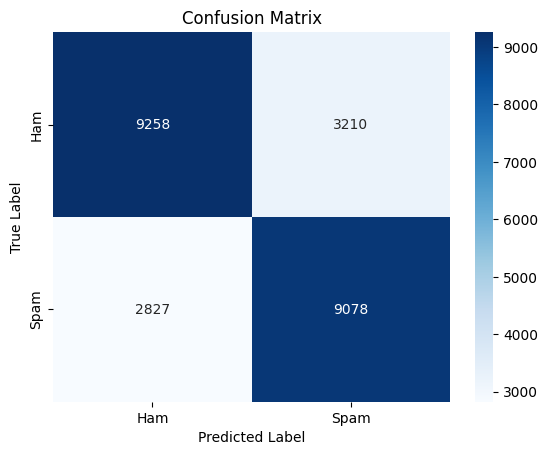

Train Accuracy: 0.7669
Test Accuracy : 0.7523


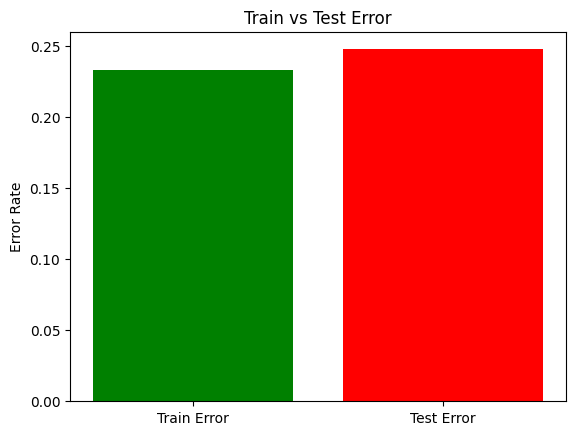

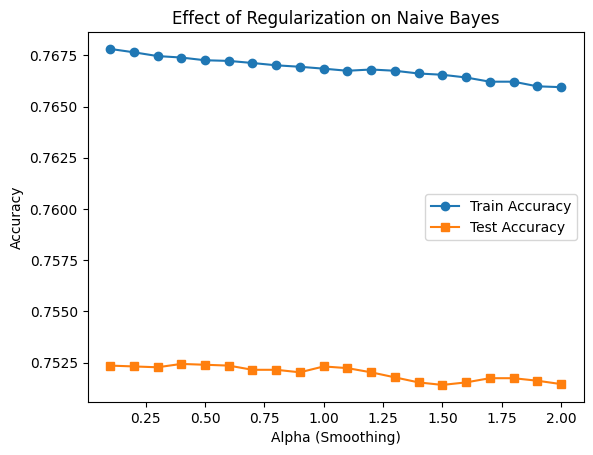

In [1]:
# ===============================================
# YouTube-Twitter-SMS Spam Detection (Naive Bayes)
# ===============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------------------------
# Step 1: Load dataset
# -----------------------------------------------
# Update the path if your dataset is inside a different folder
data = pd.read_csv("/kaggle/input/youtube-twitter-sms-spam-dataset/Final-Dataset.csv")

print("Dataset shape:", data.shape)
print(data.head())

# -----------------------------------------------
# Step 2: Select Features and Target
# -----------------------------------------------
X = data["FORMATTED_CONTENT"]   # text messages
y = data["CLASS"]               # labels (0=ham, 1=spam)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------------------------
# Step 3: Convert Text → Numerical (TF-IDF)
# -----------------------------------------------
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# -----------------------------------------------
# Step 4: Train Naive Bayes Model
# -----------------------------------------------
nb = MultinomialNB(alpha=1.0)  # alpha is Laplace smoothing
nb.fit(X_train_tfidf, y_train)

# Predictions
y_train_pred = nb.predict(X_train_tfidf)
y_test_pred = nb.predict(X_test_tfidf)

# -----------------------------------------------
# Step 5: Evaluation
# -----------------------------------------------
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred, target_names=["Ham", "Spam"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Ham", "Spam"],
            yticklabels=["Ham", "Spam"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy : {test_acc:.4f}")

# -----------------------------------------------
# Step 6: Train vs Test Error plot
# -----------------------------------------------
plt.bar(["Train Error", "Test Error"],
        [1-train_acc, 1-test_acc],
        color=["green","red"])
plt.title("Train vs Test Error")
plt.ylabel("Error Rate")
plt.show()

# -----------------------------------------------
# Step 7: Effect of Regularization (alpha)
# -----------------------------------------------
alphas = np.linspace(0.1, 2.0, 20)
train_acc_list, test_acc_list = [], []

for a in alphas:
    model = MultinomialNB(alpha=a)
    model.fit(X_train_tfidf, y_train)
    train_acc_list.append(accuracy_score(y_train, model.predict(X_train_tfidf)))
    test_acc_list.append(accuracy_score(y_test, model.predict(X_test_tfidf)))

plt.plot(alphas, train_acc_list, label="Train Accuracy", marker="o")
plt.plot(alphas, test_acc_list, label="Test Accuracy", marker="s")
plt.xlabel("Alpha (Smoothing)")
plt.ylabel("Accuracy")
plt.title("Effect of Regularization on Naive Bayes")
plt.legend()
plt.show()
